# Used Car Price Prediction

Life cycle of Macine Learning Project

# 1. Problem Statement

# 2. Data Collection

### 2.1 Import Data and Required Packages

##### Importing Pandas,Numpy,Matplotlib,seaborn and Warnings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline


### Download and import the csv Data as Pandas DataFrame

In [2]:
download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col =[0])

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.shape

(15411, 13)

In [5]:
#  Display Summary statistics for a dataframe

df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [7]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

# 3. Exploring Data

In [8]:
#  Define numerical & Categorical columns.
numeric_features = [fea for fea in df.columns if df[fea].dtype != "O"]
categorical_features = [fea for fea in df.columns if df[fea].dtype == "O"]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [9]:
#  proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
---------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini              0.

# Univariate Analysis

### Numerical Features

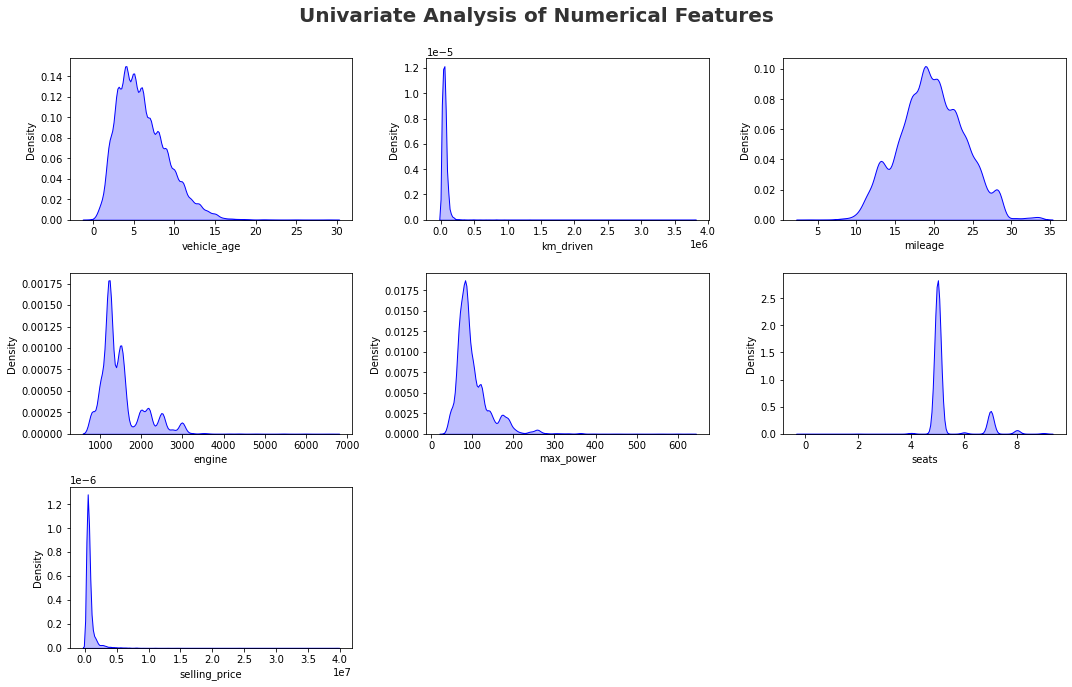

In [10]:
 plt.figure(figsize=(15,15))
 plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20, fontweight='bold',alpha=0.8,y=1.)
            
 for i in range(0, len(numeric_features)):
     plt.subplot(5,3,i+1)
     sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
     plt.xlabel(numeric_features[i])
     plt.tight_layout()       

# Categorical features

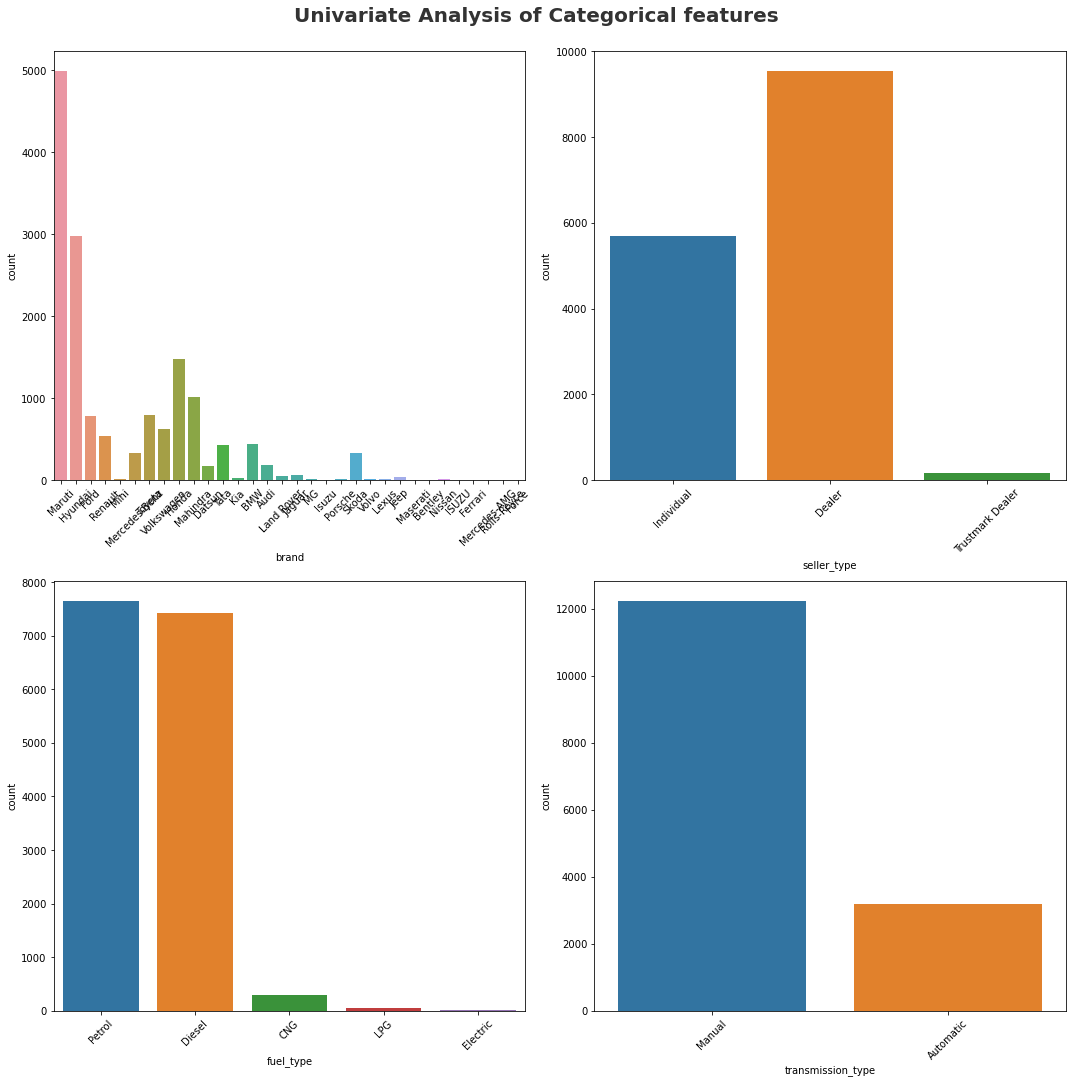

In [11]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Categorical features", fontsize=20,fontweight='bold',alpha=0.8,y=1.)
cat1 = ['brand','seller_type','fuel_type','transmission_type']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Multivariate Analysis

In [12]:
# Check Multi-collinearity in Numerical features.

df[(list(df.columns))]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [13]:
df[(list(df.columns))]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [14]:
df[(list(df.columns)[1:])].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


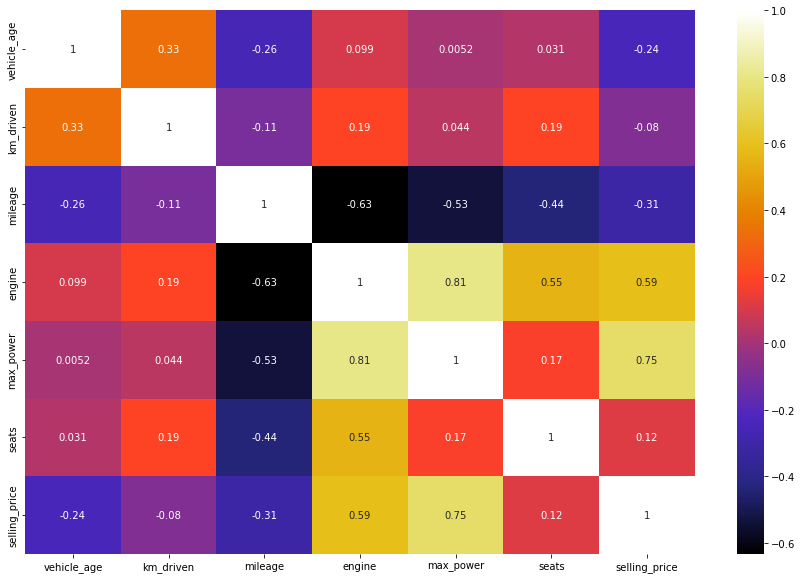

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap", annot=True)
plt.show()

##  Report

In [16]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'],df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis.")
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['column','Hypothesis Result']
result

,column,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


## Checking Null Values

In [17]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [18]:
continous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print("Num of continous features:", continous_features)

Num of continous features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


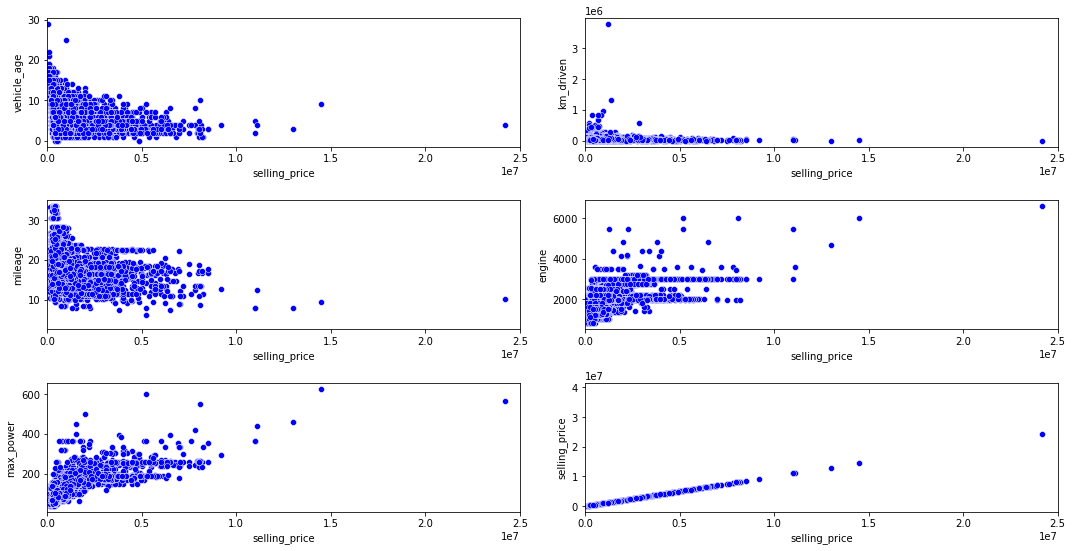

In [19]:
fig = plt.figure(figsize=(15,20))

for i in range(0, len(continous_features)):
    ax = plt.subplot(8,2,i+1)

    
    sns.scatterplot(data=df,x='selling_price', y=continous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 Lakhs to view a clean picture
    plt.tight_layout()

# 4. Visualization

### Visualize the Target Feature

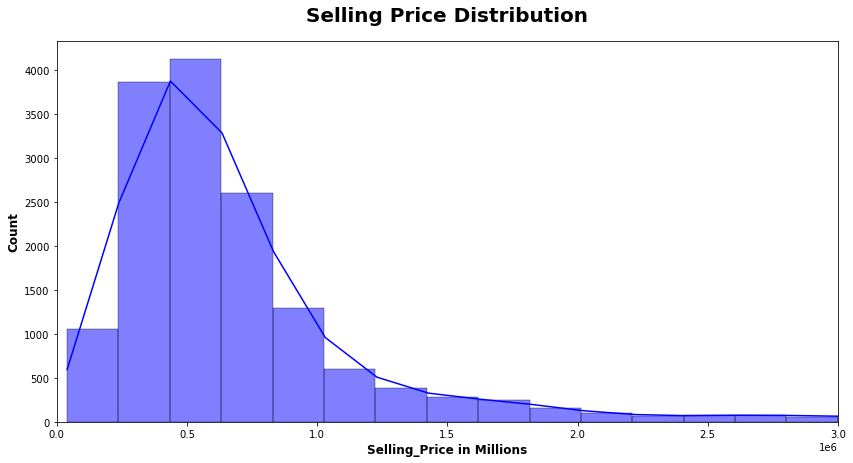

In [20]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color='b')
plt.title('Selling Price Distribution', weight='bold', fontsize=20, pad=20)
plt.ylabel("Count", weight='bold', fontsize=12)
plt.xlabel("Selling_Price in Millions", weight='bold', fontsize=12)
plt.xlim(0,3000000)
plt.show()

### 4.2 Most selling car in this dataset.

In [21]:
df.car_name.value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

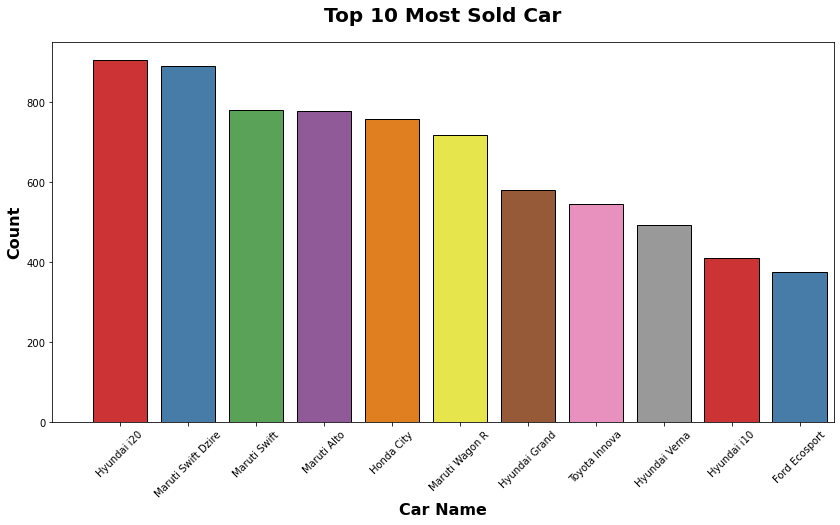

In [22]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec="black",palette="Set1",order= df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight='bold', fontsize=20, pad=20)
plt.xlabel("Car Name", weight='bold', fontsize=16)
plt.ylabel("Count",weight='bold',fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [23]:
# Checking mean Price of Hyundai i20 ,WHich is the most selling car.
mean_i20 = df[df['car_name']=='Hyundai i20']['selling_price'].mean()
print(f'Mean Price of Hyundai i20 is {mean_i20:.2f} Rupees')

Mean Price of Hyundai i20 is 543603.75 Rupees


## Most Selling Brand


In [24]:
df['brand'].value_counts()[0:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

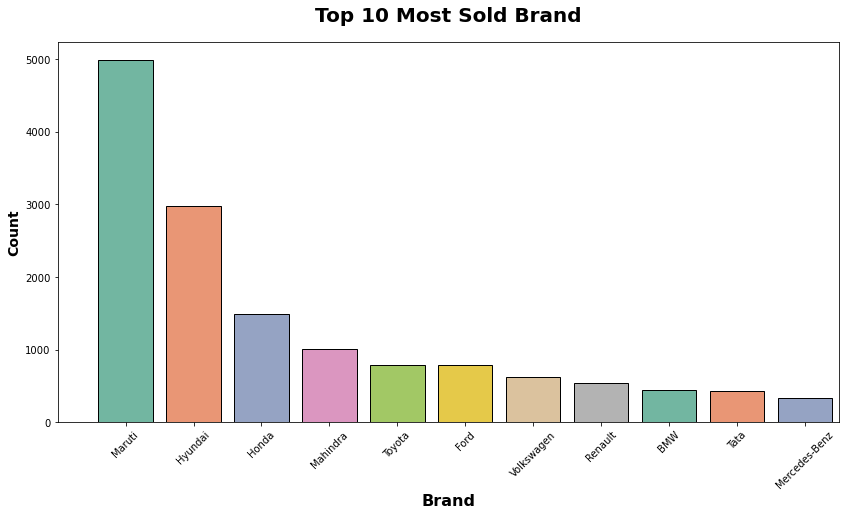

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x='brand', data=df,ec='black',palette='Set2',order= df['brand'].value_counts().index)
plt.title('Top 10 Most Sold Brand', weight="bold", fontsize=20, pad=20)
plt.xlabel('Brand', weight="bold", fontsize=16)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.xlim(-1,10.5)
plt.show()

In [26]:
#  Checking the mean price of Maruti brand
mean_maruti = df[df['brand']=='Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {mean_maruti:0.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


## Costliest Brand And Costliest Car

In [27]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [28]:
brand = df.groupby('brand').selling_price.max()

In [29]:
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


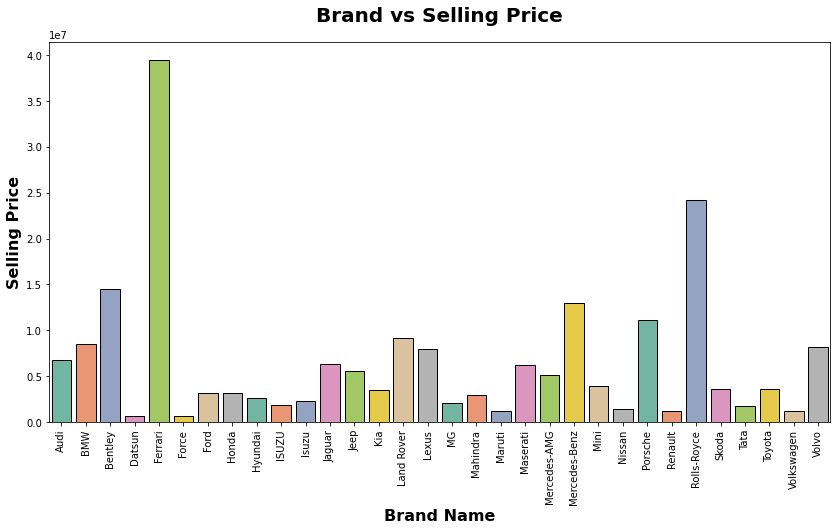

In [30]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y= brand.values,ec='black',palette='Set2')
plt.title("Brand vs Selling Price", weight='bold',fontsize=20, pad=20)
plt.ylabel('Selling Price',fontsize=16,weight='bold')
plt.xlabel('Brand Name',fontsize=16,weight='bold')
plt.xticks(rotation=90)
plt.show()

## Costliest Car

In [31]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [32]:
costliest_car = df.groupby('car_name').selling_price.max()
costliest_car = costliest_car.to_frame().sort_values('selling_price',ascending=False)[0:10]
costliest_car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


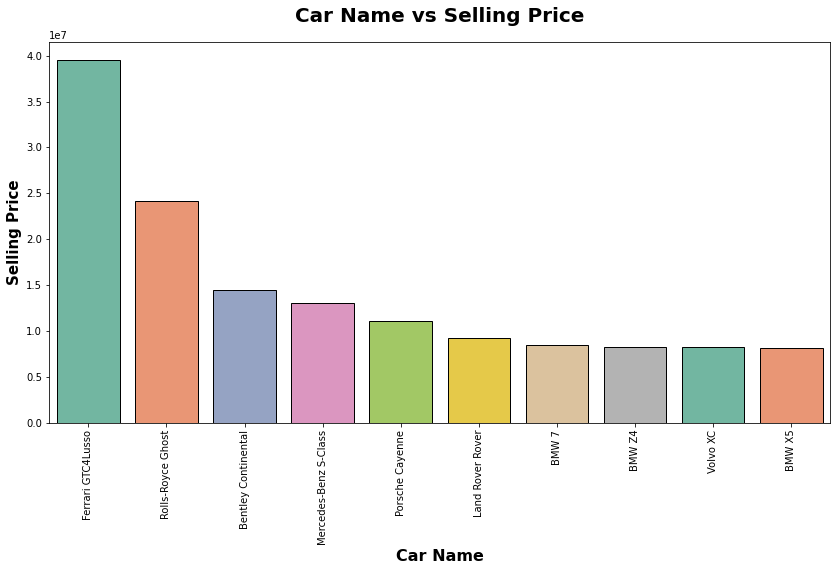

In [33]:
plt.subplots(figsize=(14,7))
sns.barplot(x=costliest_car.index, y= costliest_car.selling_price, ec='black', palette='Set2')
plt.title('Car Name vs Selling Price',weight='bold',fontsize=20,pad=20)
plt.xlabel('Car Name', weight='bold',fontsize=16)
plt.ylabel('Selling Price',weight='bold',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Maximum Mileage Brand


In [34]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


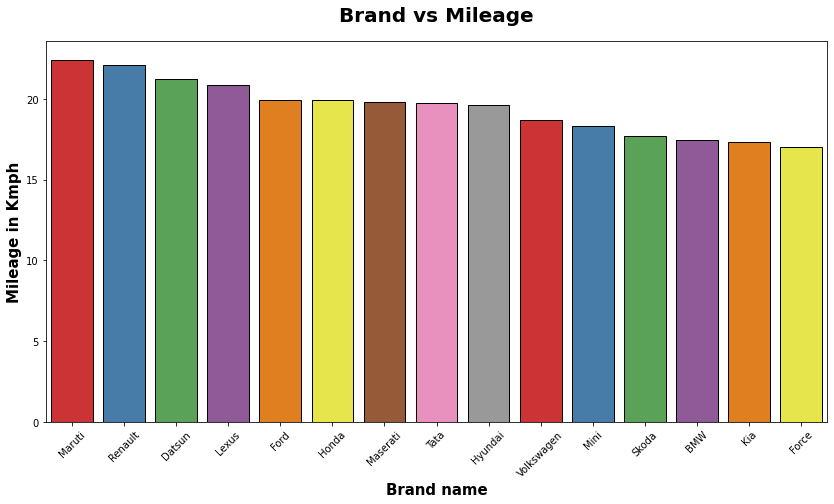

In [35]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec='black',palette="Set1")
plt.title('Brand vs Mileage', weight='bold',fontsize=20, pad=20)
plt.xlabel('Brand name',weight='bold',fontsize=15)
plt.ylabel('Mileage in Kmph', weight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Car with highest mileage

In [36]:
mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


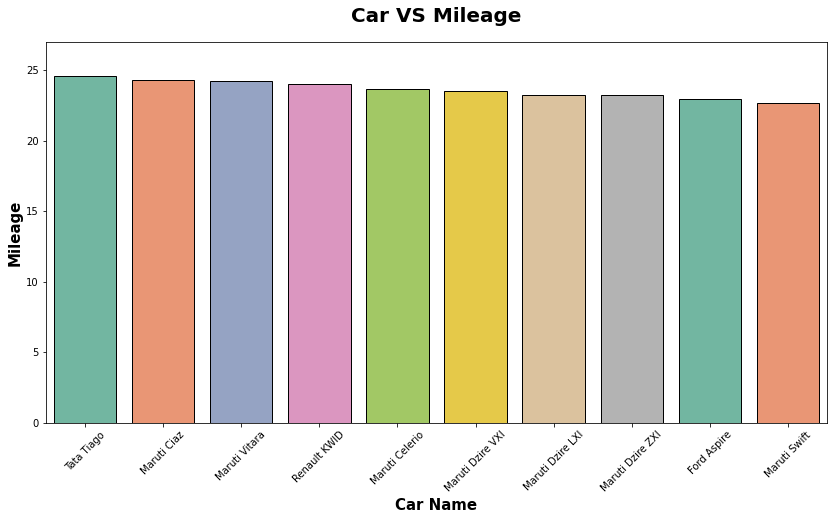

In [37]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_car.index, y=mileage_car.values, ec='black',palette='Set2')
plt.title('Car VS Mileage', weight='bold',fontsize=20,pad=20)
plt.xlabel('Car Name',weight='bold',fontsize=15)
plt.ylabel('Mileage',weight='bold',fontsize=15)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

## Kilometer Driven VS Selling Price

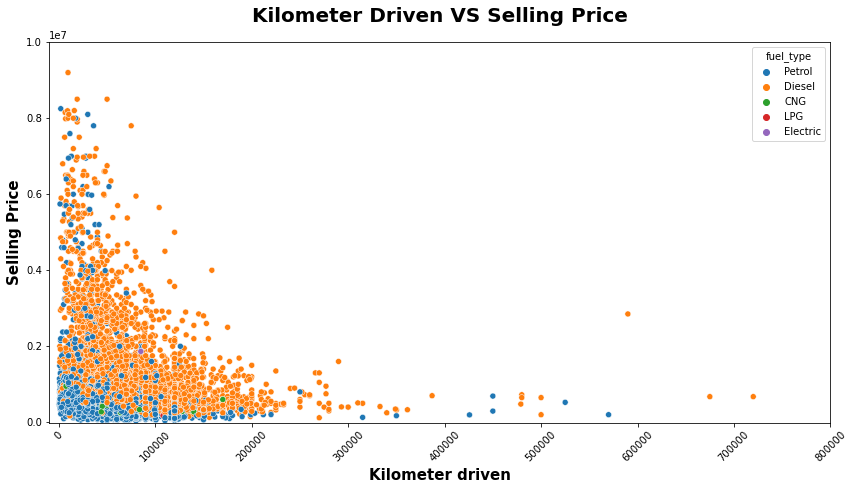

In [38]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y="selling_price", data=df,ec="white", color='b', hue='fuel_type')
plt.title('Kilometer Driven VS Selling Price',weight='bold',fontsize=20,pad=20)
plt.xlabel('Kilometer driven',weight='bold',fontsize=15)
plt.ylabel('Selling Price', weight='bold',fontsize=15)
plt.ylim(-10000,10000000)
plt.xlim(-10000,800000)
plt.xticks(rotation=45)
plt.show()

In [39]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


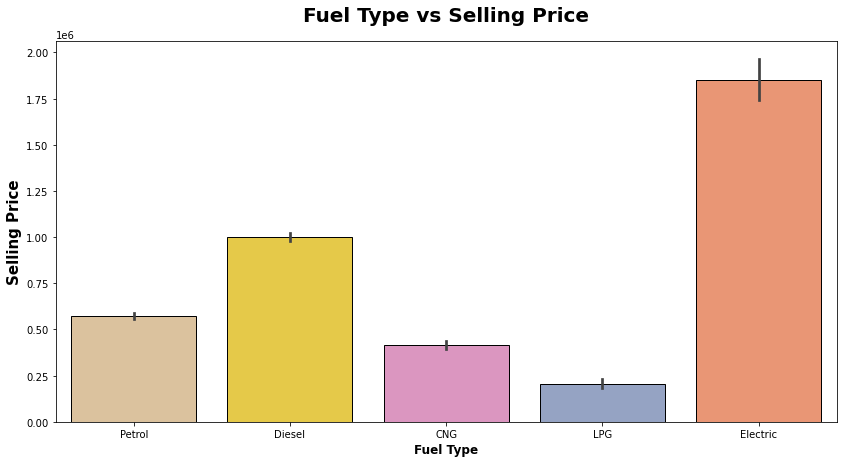

In [40]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel_type, y= df.selling_price, ec='black',palette='Set2_r')
plt.title('Fuel Type vs Selling Price', weight='bold',fontsize=20, pad=20)
plt.xlabel('Fuel Type', weight='bold',fontsize=12)
plt.ylabel('Selling Price',weight='bold',fontsize=15)
plt.show()


## Most Sold Fuel type

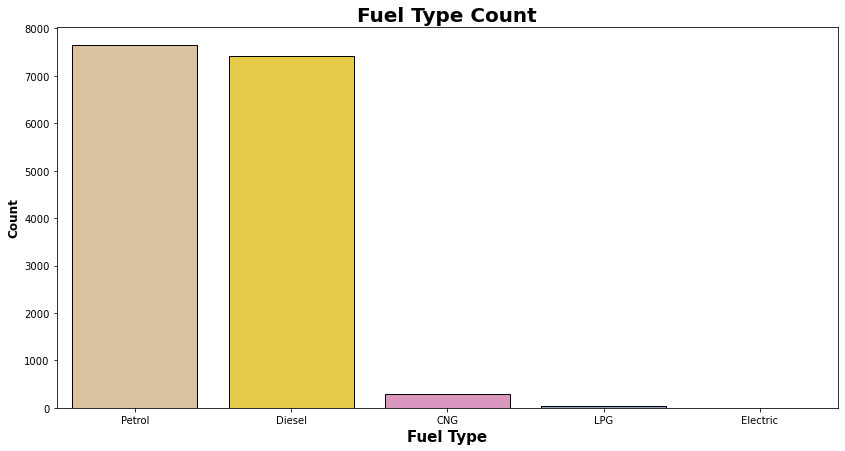

In [42]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec='black', palette='Set2_r')
plt.title('Fuel Type Count',weight='bold',fontsize=20)
plt.xlabel('Fuel Type',weight='bold',fontsize=15)
plt.ylabel('Count',weight='bold',fontsize=12)
plt.show()

### Fuel types available and mileage given

In [44]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [45]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


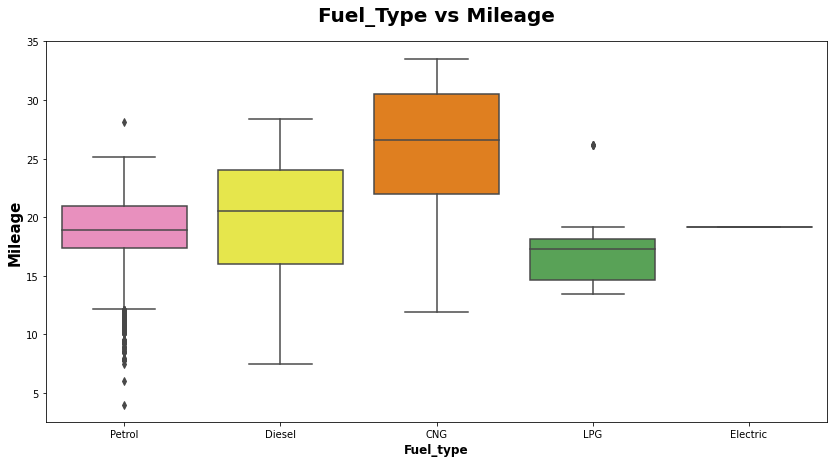

In [47]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='mileage',data=df,palette='Set1_r')
plt.title('Fuel_Type vs Mileage',weight='bold',fontsize=20, pad=20)
plt.xlabel('Fuel_type',weight='bold',fontsize=12)
plt.ylabel('Mileage',weight='bold',fontsize=15)
plt.show()

### Mileage vs Selling Price 

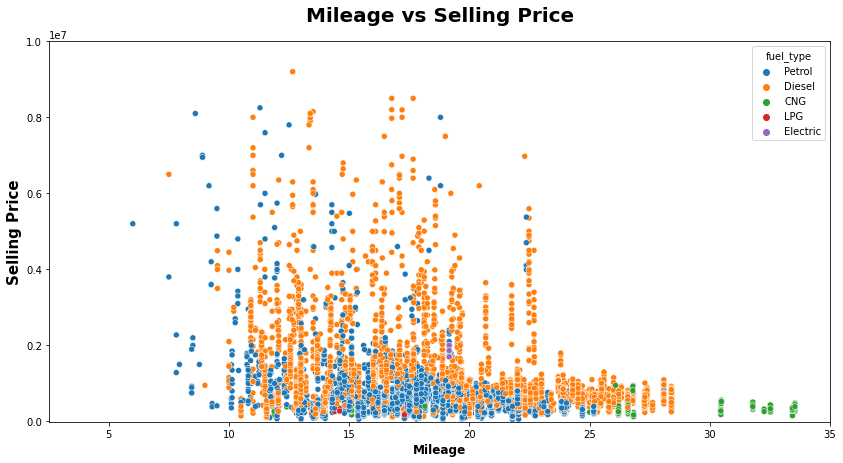

In [50]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x='mileage',y='selling_price',data=df,ec='white',color='b',hue="fuel_type")
plt.title('Mileage vs Selling Price',weight='bold',fontsize=20,pad=20)
plt.xlabel('Mileage',weight='bold',fontsize=12)
plt.ylabel('Selling Price',weight='bold', fontsize=15)
plt.ylim(-10000,10000000)
plt.show()

### Mileage Distribution

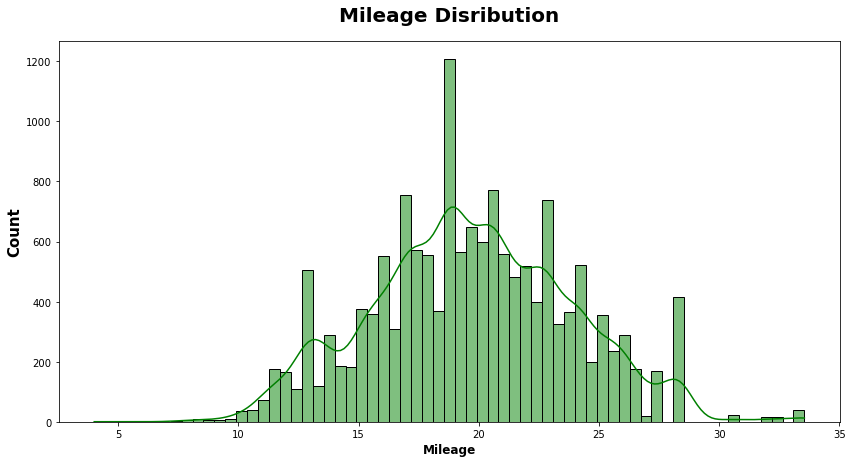

In [51]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage,ec='black', color='g',kde=True)
plt.title('Mileage Disribution',weight='bold', fontsize=20, pad=20)
plt.xlabel('Mileage',weight='bold',fontsize=12)
plt.ylabel('Count',weight='bold',fontsize=15)
plt.show()


### Vehicle age vs Selling Price

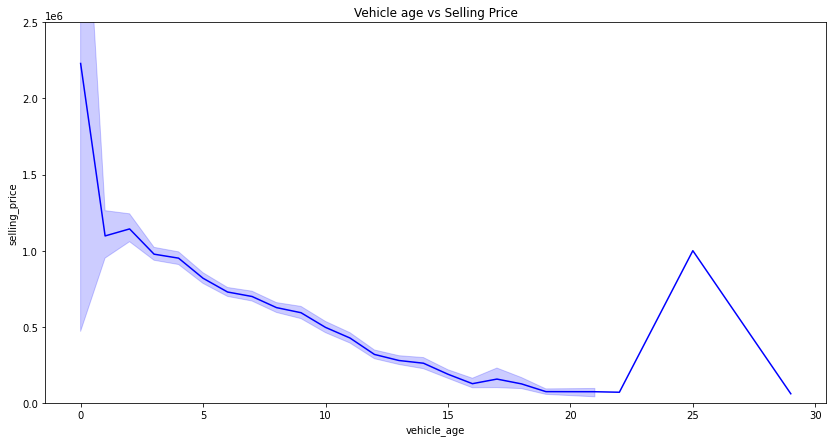

In [52]:
plt.subplots(figsize=(14,7))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.title('Vehicle age vs Selling Price')
plt.ylim(0,2500000)
plt.show()

### Vehicle Age vs Mileage

In [53]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)


,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


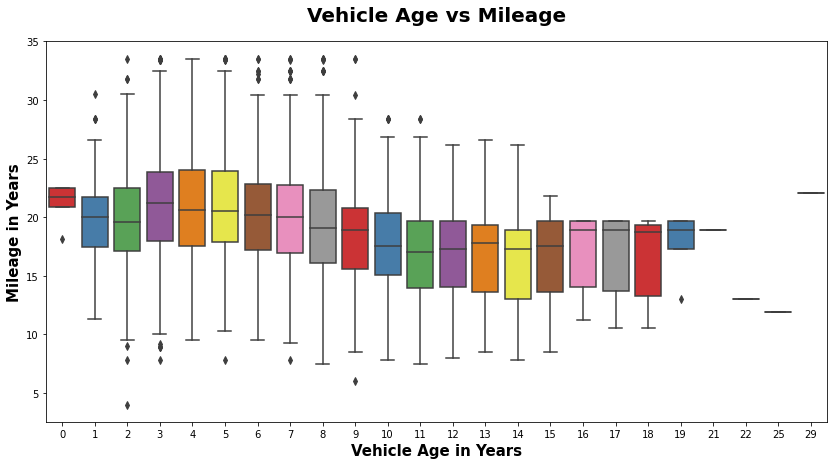

In [54]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y=df.mileage,palette="Set1")
plt.title('Vehicle Age vs Mileage',weight='bold',fontsize=20, pad=20)
plt.xlabel('Vehicle Age in Years',weight='bold',fontsize=15)
plt.ylabel('Mileage in Years',weight='bold',fontsize=15)
plt.show()

### Report

In [61]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False)

oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
...,...
Hyundai Venue,2
Renault Triber,2
Kia Carnival,1


### Report

## Transmission Type

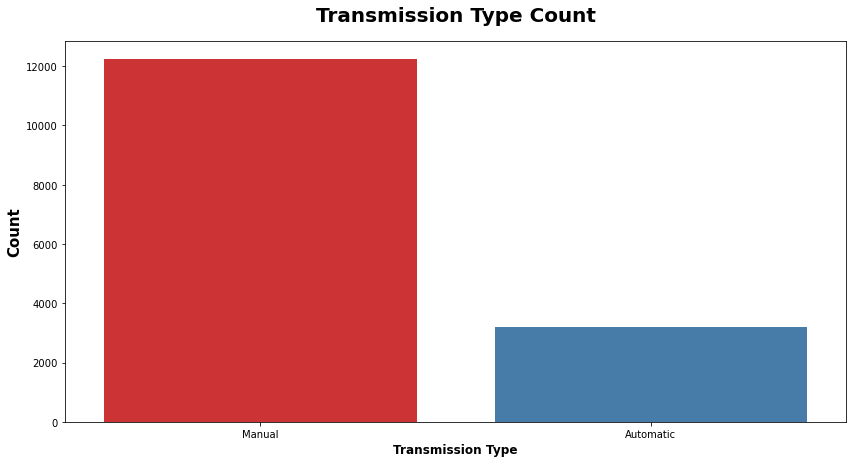

In [62]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type',data=df,palette='Set1')
plt.title('Transmission Type Count',weight='bold',fontsize=20, pad=20)
plt.xlabel('Transmission Type',weight='bold',fontsize=12)
plt.ylabel('Count',weight='bold',fontsize=15)
plt.show()

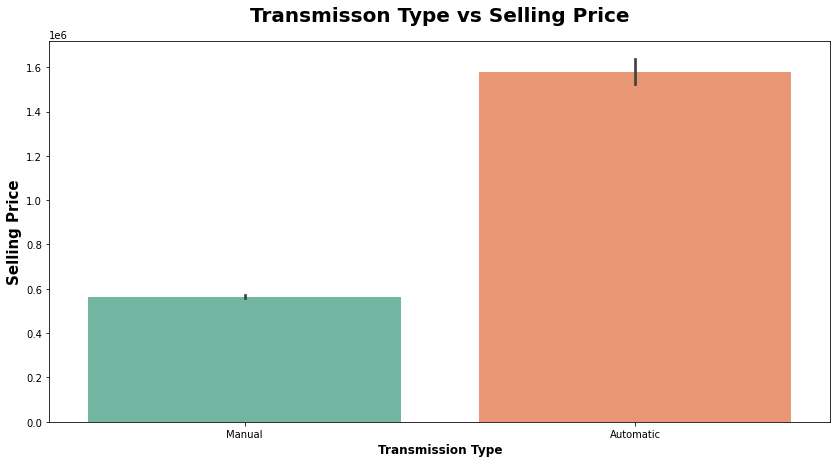

In [63]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type',y='selling_price',data=df,palette='Set2')
plt.title('Transmisson Type vs Selling Price',weight='bold',fontsize=20, pad=20)
plt.xlabel('Transmission Type',weight='bold',fontsize=12)
plt.ylabel('Selling Price',weight='bold',fontsize=15)
plt.show()

### Report

## Seller Type


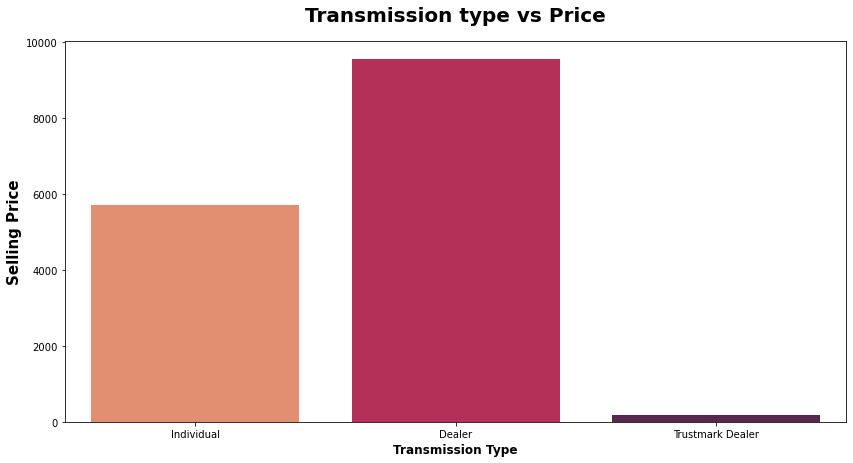

In [65]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type',data=df,palette="rocket_r")
plt.title('Transmission type vs Price',weight='bold',fontsize=20,pad=20)
plt.xlabel('Transmission Type',weight='bold',fontsize=12)
plt.ylabel('Selling Price',weight='bold',fontsize=15)
plt.show()

In [67]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=True)
dealer.to_frame()

,selling_price
seller_type,
Individual,507000.0
Trustmark Dealer,540000.0
Dealer,591000.0
